# Homework Lecture 7

Calculate a one variable problem.

A person throws a ball upwards from the ground at speed of 10 $\frac{m}{s}$.
Calculate the trajectory using Runge-Katta method and plot height (z) vs time (t).

Using a free-body diagram, we know that the only force acting on the ball is the gravitational force (mg).
Using Newtons second law
\begin{eqnarray}
F &=& mg\\
ma &=& mg\\
a &=& g\\
\frac{d^2 z(t)}{dt^2} &=& g.
\end{eqnarray}

This is an ordinary differential equation with only one independent variable (time, t).

Now we will break it up
\begin{eqnarray}
\frac{dz(t)}{dt} &=& v_z\\
\frac{dv_z}{dt} &=& g
\end{eqnarray}

### 2. Runge-Kutta Rule

Based on integral
\begin{equation}
{\bf z}(t)=\int {\bf f}(t,z)dt
\end{equation}
So
\begin{equation}
{\bf z}_{n+1}={\bf z}_{n}+\int_{t_{n}}^{t_{n+1}}{\bf f}(t,z)dt
\end{equation}

RK 2 is
\begin{equation}
{\bf z}_{n+1}\simeq {\bf z}_{n}+{\bf f}(t_{n+1/2},z_{n+1/2})h+O(h^3)
\end{equation}
and ${\bf f}(t_{n+1/2},z_{n+1/2})$ is derived with Euler method.
\begin{eqnarray}
{\bf z}_{n+1}&\simeq &{\bf z}_{n}+{\bf k_{2}}\\
{\bf k_{2}}&=&h {\bf f}(t_{n}+h/2,{\bf z}_{n}+\frac{{\bf k_{1}}}{2})\qquad {\bf k}_{1}=h{\bf f}(t_n,{\bf z}_{n})
\end{eqnarray}

RK 4 is
\begin{eqnarray}
{\bf z}_{n+1}&\simeq &{\bf z}_{n}+\frac{1}{6}({\bf k_{1}}+2{\bf k_{2}}+2{\bf k_{3}}+{\bf k_{4}})\\
{\bf k}_{1}&=&h{\bf f}(t_n,{\bf z}_{n})\\
{\bf k_{2}}&=&h {\bf f}(t_{n}+h/2,{\bf z}_{n}+\frac{{\bf k_{1}}}{2})\\
{\bf k_{3}}&=&h {\bf f}(t_{n}+h/2,{\bf z}_{n}+\frac{{\bf k_{2}}}{2})\\
{\bf k_{4}}&=&h {\bf f}(t_{n}+h,{\bf z}_{n}+{\bf k_{3}})
\end{eqnarray}

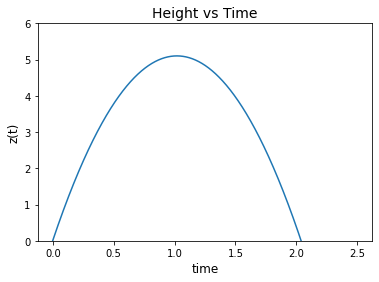

In [21]:
import numpy as np
import matplotlib.pyplot as plt

#initial conditions
g=-9.8
t_final=2.5
h=0.001
z=[0.,10.]  #z=0 where the ball is thrown from the ground at z=0 with velocity vs=10 m/s
t=0

def f(t, z):
    '''
    function we are going to calculate
    '''
    f=np.zeros(2)
    f[0]=z[1]
    f[1]=g
    return f
 
def R_K_4(t, h, z, n):
    '''
    function to use the Runge-Kutta method to solve an ordinary differential equation
    this function will update the functions
    '''
    k1 = np.zeros(n)
    k2 = np.zeros(n)
    k3 = np.zeros(n)
    k4 = np.zeros(n)
    k1=h*f(t,z)
    k2=h*f(t+0.5*h,z+0.5*k1)
    k3=h*f(t+0.5*h,z+0.5*k2)
    k4=h*f(t+0.5*h,z+k3)
    z+=(k1+2*k2+2*k3+k4)/6
    return z

z_values=[]
time_values=[]

#This will store our variables
while(t<t_final):
    if((t+h)>t_final):
        h=t_final-t
    z = R_K_4(t,h,z,10)
    z_values=np.append(z_values,z[0])
    time_values=np.append(time_values,t)
    t = t+h

plt.plot(time_values,z_values)
plt.xlabel('time', fontsize=12)
plt.ylim(0,6)
plt.ylabel('z(t)', fontsize=12)
plt.title('Height vs Time', fontsize=14)
plt.show()

So we can see from the plot that our Runge-Kutta method successfully plotted the trajectory of a ball that starts at z=o and returns to the gound just after two seconds.

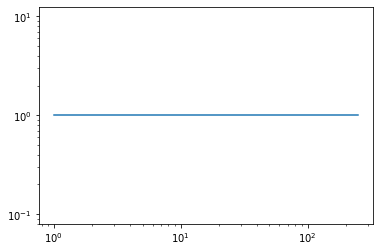

In [27]:
Oh=[]
error=[]

for h in 10.**np.arange(0.,2.5,0.2):
    Oh=np.append(Oh,h)
    g=-9.8
    t_final=2.5
    z=[0.,10.]
    t=0
    while(t<t_final):
        if((t+h)>t_final):
            h=t_final-t
        y = R_K_4(t,h,z,10)
        t = t+h
    error=np.append(error,abs(z[0]-1.))

plt.plot(Oh,error)
plt.xscale('log')
plt.yscale('log')
plt.show()

# Homework for graduate students:

Write your own Euler or any scheme to calculate the orbit of two equal mass binary.
The mass of each binary makes GM_{i}=1, (i is 1 or 2). 
The two binary stars are seperated by a distance of 1 initially. 
Initialize the binary velocity so that each binary star will have an eccentricity of 0.0. Evolve this system to 100 binary orbits, and plot their orbits in the x-y plane. 

In [ ]:
d=1
